<a href="https://colab.research.google.com/github/jindaldisha/Deep-Learning-and-Neural-Networks/blob/main/Neural-Networks-with-Tensorflow/01_1_Neural_Network_Regression_for_Medical_Cost_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Neural Network Regression For Insurance Forecast

We will be using the following steps:

- Get data ready (turn into tensors)
- Build or pick a pretrained model (to suit your problem)
- Fit the model to the data and make a prediction
- Evaluate the model
- Improve through experimentation
- Save and reload your trained model
---


Columns:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

---

 - The dependent variable (label) - charges
 - The independent variable (features) - age, sex, bmi, children, smoker, region


---

To find what someone's medical costs build by health insurance will be.

We're using the features to predict a number (the cost of the insurance), therefore it is a regression problem.


In [25]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [27]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 Since some of the features are non-numerical, we have to first turn them into numbers and also normalize the data.

In [28]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #normalize values in these columns
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

#Create x and y
x = insurance.drop("charges", axis = 1)
y = insurance["charges"]

#Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Fit the column transformer to our training data
ct.fit(x_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [29]:
#Build a Neural Network
#Set seed
tf.random.set_seed(42)

# 1. Create a Model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")                                       
])
# 2. Compile the Model
insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the Model
history = insurance_model_1.fit(x_train_normal, y_train, epochs=100, verbose=0)

In [30]:
#Evaluate the model
insurance_model_1.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3170.0486 - mae: 3170.0486


[3170.048583984375, 3170.048583984375]

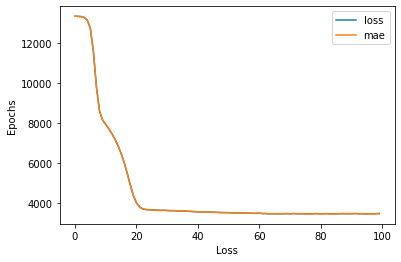

In [31]:
pd.DataFrame(history.history).plot()
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend();

Experimenting to improve our model's performance.
To try to improve our model, we'll run the following experiments:
 - Add an extra layer and increase the number of hidden units and changing the optimizer.
 - Increase the value of epochs (train for longer).

In [32]:
#Change from the previous model - increase the number of layers and hidden units
#Set random seed
tf.random.set_seed(42)

# 1. Build a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

# 3. Fit the model
history = insurance_model_2.fit(x_train_normal, y_train, epochs=100, verbose = 0)

In [33]:
#Check the results of the insurance model on the test data
insurance_model_2.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

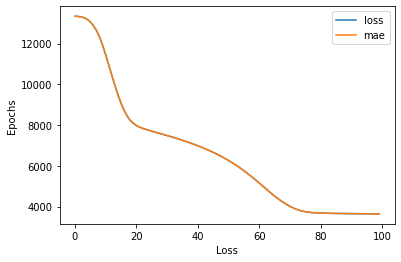

In [34]:
pd.DataFrame(history.history).plot()
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend();

In [35]:
#Change from the previous model - train for longer
#Set seed
tf.random.set_seed(42)

# 1. Create a Model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)                                       
])
# 2. Compile the Model
insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)
# 3. Fit the Model
history = insurance_model_3.fit(x_train_normal, y_train, epochs=200, verbose=0)

In [38]:
#Check the results of the insurance model on the test data
insurance_model_3.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5776 - mae: 3171.5776


[3171.57763671875, 3171.57763671875]

Text(0.5, 0, 'Epochs')

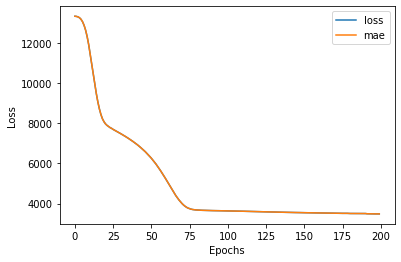

In [37]:
#Plot history (Loss Curve/ Training Curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")